In [ ]:
from torch import nn
import torch.nn.functional as F
import numpy as np
import torchvision
import torchvision.models as models
from torchvision import datasets
import torchvision.transforms as transforms
from torchvision.transforms.functional import crop
import cv2
import matplotlib.pyplot as plt
import time
import torch

In [ ]:
def crop_r(image):
    return crop(image, 4, 124, 124, 124)
    
def crop_l(image):
    return crop(image, 4, 4, 124, 124)  
    
transform_right = transforms.Compose(
    [
        transforms.Resize((256,256)),
        #transforms.RandomRotation(10),
        transforms.Lambda(crop_r),
        transforms.ToTensor(),
        transforms.Normalize((0.36, 0.36, 0.36), (0.28, 0.28, 0.28))
    ])
transform_left = transforms.Compose(
    [
        transforms.Resize((256,256)),
        #transforms.RandomRotation(10),
        transforms.Lambda(crop_l),
        transforms.ToTensor(),
        transforms.Normalize((0.36, 0.36, 0.36), (0.28, 0.28, 0.28))
    ])

In [ ]:
train_path = '/content/drive/MyDrive/Datasets/KITTI/05'
batch_size = 1

train_r = datasets.ImageFolder(train_path, transform_right)
train_l = datasets.ImageFolder(train_path, transform_left)

train_loader_r = torch.utils.data.DataLoader(train_r, batch_size)
train_loader_l = torch.utils.data.DataLoader(train_l, batch_size)


In [ ]:
weights = models.ConvNeXt_Base_Weights
model = models.convnext_base(weights=weights)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ConvNeXt_Base_Weights.IMAGENET1K_V1`. You can also use `weights=ConvNeXt_Base_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
output_ = []
inicio = 5100
inicio1 = 5101
fim = 5120
nome_tensor = 103

In [ ]:
for i, data in enumerate(train_loader_r):
    if i > inicio:
        inputs, labels = data
        outputs = model(inputs)
        output_.append(outputs)
        if i > fim:
            break

In [ ]:
for i,data in enumerate(train_loader_l):
    if i > inicio:
        inputs, labels = data
        outputs = model(inputs)
        output_[i-inicio1] = torch.cat((output_[i-inicio1], outputs), 1)
        if i > fim:
            break
out_path = '/content/drive/MyDrive/Datasets/tensors_kitti_05_convnext/tensors'+str(nome_tensor)+'.pt'
torch.save(output_,out_path)            

In [ ]:
def match(cam_img, db_img, dist_limit):
    distance = torch.cdist(cam_img, db_img, p=2)
    max_dist = torch.max(distance)
    if max_dist <= dist_limit:
        return True
    
    return False

In [ ]:
def belief_generation(db, descriptor):
    belief = []
    lp = 0
    for d in db:
        bg = match(descriptor, d, 24)
        if bg:
            belief.append(1)
        else:
            belief = []
        if len(belief) >= 3:
            print('loop')
            print(d)
            lp += 1
    return lp

In [ ]:
database = [database1,database2,database3,database4,database5,database6,database7,database8,database9,database10,
            database11,database12,database13,database14,database15,database16,database17,database18,database19,database20,
            database21,database22,database23,database24,database25,database26,database27,database28,database29,database30,
            database31,database32,database33,database34,database35,database36,database37,database38,database39,database40,
            database41,database42,database43,database44,database45,database46,database47,database48,database49,database50,
            database51,database52,database53,database54,database55,database56,database57,database58,database59,database60,
            database61,database62,database63,database64,database65,database66,database67,database68,database69,database70,
            database71,database72,database73,database74,database75,database76,database77,database78,database79,database80,
            database81,database82,database83,database84,database85,database86,database87,database88,database89,database90,
            database91,database92,database93,database94,database95,database96,database97,database98,database99,database100,
            database101,database102,database103]

d = []

In [ ]:
co = 0
for bg in database:
  co += 1
  for i,data in enumerate(bg):
    if i < 3:
      d.append(data)
    else:
      loop_ = belief_generation(d, data)
      with open('/content/drive/MyDrive/Datasets/KITTI/loop_kitti_05_convnext.txt', 'a') as txt_file:
        if loop_ > 0:
          txt_file.write('Found loop')
          image_number = (co*50)+i
          txt_file.write('\n image: '+str(image_number))
          txt_file.write('\n')
        else:
          d.append(data)



loop
tensor([[ 0.0878,  0.1562, -1.0967,  ..., -0.7275, -0.5303, -0.8444]],
       requires_grad=True)
loop
tensor([[-0.4618, -0.9187, -1.3345,  ..., -1.0229, -0.4297, -0.4461]],
       requires_grad=True)
loop
tensor([[-0.2052, -0.4672, -0.9405,  ..., -1.1794,  0.2344, -0.7487]],
       requires_grad=True)
loop
tensor([[ 0.2397, -0.5293, -0.6098,  ..., -1.0805,  0.5278, -0.9363]],
       requires_grad=True)
loop
tensor([[-0.0560,  0.1984,  0.4057,  ..., -0.5649,  0.7001,  0.5874]],
       requires_grad=True)
loop
tensor([[ 0.3666, -0.1867, -0.0319,  ..., -1.2112,  0.8703,  0.1300]],
       requires_grad=True)
loop
tensor([[ 0.2727, -0.6062, -0.5551,  ..., -0.2856,  0.3458,  0.1284]],
       requires_grad=True)
loop
tensor([[ 0.4676, -0.1005, -0.3025,  ..., -0.6862,  0.2557, -0.6065]],
       requires_grad=True)
loop
tensor([[ 0.3077, -0.2546, -0.1724,  ..., -0.7568,  0.6259, -0.4707]],
       requires_grad=True)
loop
tensor([[ 5.2319e-01, -4.1078e-01,  1.7912e-04,  ..., -1.0534e+00,
 

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Datasets/metricas/kitti_05_convnext.csv')


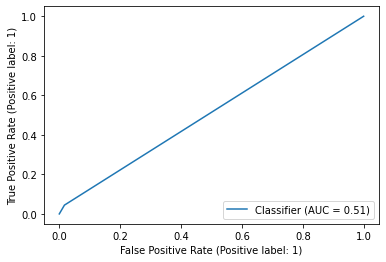

In [ ]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt


RocCurveDisplay.from_predictions(df['actual'], df['pred'])
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score


print('AUC: ',roc_auc_score(df['actual'], df['pred']))
print('Accuracy: ',accuracy_score(df['actual'], df['pred']))
print('f1: ',f1_score(df['actual'], df['pred']))


AUC:  0.5137980971687673
Accuracy:  0.8685258964143426
f1:  0.07633587786259544


In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(df['actual'], df['pred'])